In [94]:
import sys
default_stdout = sys.stdout
default_stderr = sys.stderr
reload(sys)
sys.stdout = default_stdout
sys.stderr = default_stderr
sys.setdefaultencoding('utf-8')
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number
import mysql.connector
from mysql.connector import Error
# Enable inline plotting
%matplotlib inline



In [5]:
dfsy = pd.read_csv('/Users/Jackie/Desktop/predict/shinYee.csv',index_col = 0)

In [6]:
dfpsy = pd.read_csv('/Users/Jackie/Desktop/predict/0109test3.csv',index_col = 0)


In [19]:
# dfpsy.loc['VEZPT20']
dfpsy.columns = [u'road',u'loc',u'direct',u'week',u'period',u'eq',u'jamp']
# dfpsy

In [60]:
dfpsy.ix['VEZPT20',:]

,road,loc,direct,week,period,eq,jamp
VD編號,,,,,,,
VEZPT20,2,和平東路三段234號前,E,0,a,550,0%
VEZPT20,2,和平東路三段234號前,E,0,p,886,20%
VEZPT20,2,和平東路三段234號前,E,1,a,557,0%
VEZPT20,2,和平東路三段234號前,E,1,p,896,25%
VEZPT20,2,和平東路三段234號前,E,2,a,572,0%
VEZPT20,2,和平東路三段234號前,E,2,p,909,25%
VEZPT20,2,和平東路三段234號前,E,3,a,561,0%
VEZPT20,2,和平東路三段234號前,E,3,p,913,27%
VEZPT20,2,和平東路三段234號前,E,4,a,573,0%


In [78]:
# dfsy.loc['VEZPT20'].head(5)
dfsy.columns = [u'area',u'loc',u'lane',u'direct',u'date',u'time',u'eq',u'avgspeed',u'avgaccup',u'avgdis',u'week']
dfsyc =dfsy.loc[lambda x: (x.time <'10:00:00') & (x.time >'06:00:00')&(x.week == 'Mon') ,:].copy()


In [79]:

# dfsyc =dfsy.loc[lambda x: (x.time <'20:00:00') & (x.time >'16:00:00')&(x.week == 'Mon') ,:].copy()


In [82]:
dfsyc.head(6)

,area,loc,lane,direct,date,time,eq,avgspeed,avgaccup,avgdis,week
VD編號,,,,,,,,,,,
VEZPT20,信義區,和平東路三段234號前,2,東,2016-04-04,07:00:00,155.50000,37.198390,0.890,110.87,Mon
VEZPT20,信義區,和平東路三段234號前,2,東,2016-04-04,08:00:00,202.50000,33.933056,1.395,136.90,Mon
VEZPT20,信義區,和平東路三段234號前,2,東,2016-04-04,09:00:00,253.00000,34.046333,1.600,153.30,Mon
VEZPT20,信義區,和平東路三段234號前,2,東,2016-04-11,07:00:00,153.00000,35.298855,1.015,110.41,Mon
VEZPT20,信義區,和平東路三段234號前,2,東,2016-04-11,08:00:00,274.00000,34.609528,1.890,119.07,Mon
VEZPT20,信義區,和平東路三段234號前,2,東,2016-04-11,09:00:00,331.05264,34.257310,2.290,103.50,Mon


In [91]:
VEZPT20p = dfsyc.ix['VEZPT20',:].groupby('date').sum()
((VEZPT20p['eq']/550 - 1)).mean()*100
# VEZPT20p['eq'].describe()

26.58130848484848

In [97]:
npdf = pd.read_csv('/Users/Jackie/Desktop/predict/np.csv',index_col = 0)
npdf.columns = [u'road',u'loc',u'direct',u'week',u'period',u'eq',u'jamp']

In [98]:
npdf.head(10)

,road,loc,direct,week,period,eq,jamp
VD編號,,,,,,,
VU5QC60,內湖路1段,內湖路1段59號加油站前路燈桿,W,0,a,2072,34%
VU5QC60,內湖路1段,內湖路1段59號加油站前路燈桿,W,0,p,2523,53%
VU5QC60,內湖路1段,內湖路1段59號加油站前路燈桿,W,1,a,2112,36%
VU5QC60,內湖路1段,內湖路1段59號加油站前路燈桿,W,1,p,2415,48%
VU5QC60,內湖路1段,內湖路1段59號加油站前路燈桿,W,2,a,2062,33%
VU5QC60,內湖路1段,內湖路1段59號加油站前路燈桿,W,2,p,2439,49%
VU5QC60,內湖路1段,內湖路1段59號加油站前路燈桿,W,3,a,1988,31%
VU5QC60,內湖路1段,內湖路1段59號加油站前路燈桿,W,3,p,2533,54%
VU5QC60,內湖路1段,內湖路1段59號加油站前路燈桿,W,4,a,2067,33%


In [99]:
nhdf = pd.read_csv('/Users/Jackie/Desktop/predict/nh.csv',index_col = 0)
nhdf.columns = [u'area',u'loc',u'lane',u'direct',u'date',u'time',u'eq',u'avgspeed',u'avgaccup',u'avgdis',u'week']

In [100]:
nhdf.head(10)

,area,loc,lane,direct,date,time,eq,avgspeed,avgaccup,avgdis,week
VD編號,,,,,,,,,,,
VTZY920,成功路四段,成功路(金龍路-康湖路)-成功路4段323巷口路燈桿(已附掛市警局CCTV),2,東,2016-04-01,00:00:00,285.2542,38.251442,2.405000,122.090000,Fri
VTZY920,成功路四段,成功路(金龍路-康湖路)-成功路4段323巷口路燈桿(已附掛市警局CCTV),2,東,2016-04-01,01:00:00,166.0000,38.657047,1.380000,111.430000,Fri
VTZY920,成功路四段,成功路(金龍路-康湖路)-成功路4段323巷口路燈桿(已附掛市警局CCTV),2,東,2016-04-01,02:00:00,86.5000,38.719640,0.650000,91.990000,Fri
VTZY920,成功路四段,成功路(金龍路-康湖路)-成功路4段323巷口路燈桿(已附掛市警局CCTV),2,東,2016-04-01,03:00:00,45.5000,36.774548,0.470000,61.355003,Fri
VTZY920,成功路四段,成功路(金龍路-康湖路)-成功路4段323巷口路燈桿(已附掛市警局CCTV),2,東,2016-04-01,04:00:00,48.5000,38.172173,0.625000,69.240000,Fri
VTZY920,成功路四段,成功路(金龍路-康湖路)-成功路4段323巷口路燈桿(已附掛市警局CCTV),2,東,2016-04-01,05:00:00,29.5000,34.717144,0.355000,47.635002,Fri
VTZY920,成功路四段,成功路(金龍路-康湖路)-成功路4段323巷口路燈桿(已附掛市警局CCTV),2,東,2016-04-01,06:00:00,66.0000,38.709030,0.600000,84.350000,Fri
VTZY920,成功路四段,成功路(金龍路-康湖路)-成功路4段323巷口路燈桿(已附掛市警局CCTV),2,東,2016-04-01,07:00:00,170.0000,35.480774,3.005000,125.085000,Fri
VTZY920,成功路四段,成功路(金龍路-康湖路)-成功路4段323巷口路燈桿(已附掛市警局CCTV),2,東,2016-04-01,08:00:00,448.0000,35.205597,6.360000,85.160000,Fri


In [111]:
nhdfc =nhdf.loc[lambda x: (x.time <'10:00:00') & (x.time >'06:00:00')&(x.week == 'Wed') ,:].copy()

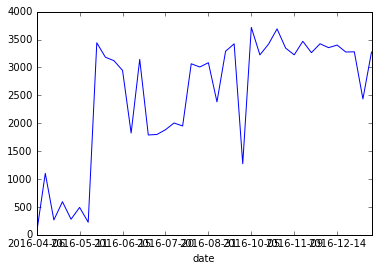

In [114]:
VU5QC60pp = nhdfc.ix['VU5QC60',:].groupby('date').sum()
((VU5QC60pp['eq']/2062 - 1)).mean()*100
VU5QC60pp['eq'].plot()